In [2]:
import visualID as vID
from visualID import color
vID.init()

**Début à:** Thursday 23 June 2022, 15:09:10  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"/></p>

# Traitement statistique de données<br>(data science pour débutants)
## 1. Lecture et analyse de la base de données par la librairie pandas

- **pandas** est une librairie python qui permet de **manipuler facilement des données** et des les **analyser**
- elle permet en particulier de manipuler des tableaux de données avec des étiquettes de variables (colonnes) et d'individus (lignes)
- ces **tableaux** sont appelés *DataFrames** (df)
- on peut facilement lire et écrire ces dataframes à partir ou vers un fichier tabulé (format **excel**, csv, etc)
- on peut faciler **tracer des graphes** à partir de ces DataFrames grâce à **matplotlib**, ou bien à l'aide d'autres librairies dédiées à l'analyse statistique de données.

<div class="warn">
Comme pour toute librairie python qui apporte des commandes et fonctionalités avancées avec leur syntaxe et logique propre, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b>, et à faire des copier/coller des principales commandes (inutile de s'encombrer le cerveau avec une syntaxe complexe). Il en existe plusieurs pour pandas, dont  une <a href="https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf">Cheat Sheet officielle, télécheargeable</a>.
</div>

In [5]:
%matplotlib inline
# ne perdons pas l'habitude de charger la librairie pylab,
# très utile pour de la programmation scientifique avec python
from pylab import *
# importation de la libairie pandas
import pandas as pd
import seaborn as sb

### 1.1. Lecture des données

In [ ]:
# on utilise la fonction read_csv de la librariries pandas (aka pd)
pd.read_csv('./iris-data/iris.csv', sep=";")

On va maintenant stocker ces données dans un *dataframe pandas*, qu'on va appeler dfi (comme DataFrame Iris). C'est un type de données tabulées, c'est-à-dire composé de 2 dimensions.

Chaque **ligne** représente un *échantillon*. Dans le domaine de l'apprentissage automatique ou des statistiques descriptives, les termes équivalents couramment utilisés sont *enregistrement*, *instance* ou *observation*.

Chaque **colonne** représente un type d'information qui a été collecté et est appelée *caractéristique*. Dans le domaine de l'apprentissage automatique et des statistiques descriptives, les termes équivalents couramment utilisés sont *variable*, *attribut* ou *descripteur*.

In [6]:
# même chose que précdemment, mais on sauve dans une variable dfi (comme dataframe iris)
dfi=pd.read_csv('./iris-data/iris.csv', sep=";")
# cette fois-ci rien n'est affiché. On va pour dela utiliser la fonction display
# qui est une fonction standard (fournie par IPython.display)
display(dfi)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<div class=warn>
    <b>attention</b>: les <i>colonnes</i> sont indexées par leur nom et les <i>lignes</i> (qu'on appelle une <b>série</b> de données) par les index entiers 0 à 149. Chacun des 150 échantillons est donc indexé par un nombre entier
</div>

### 1.2. Manipulations simples des données
#### 1.2.a. Mise en évidence de la structuration des données en tableaux
<div class='rq'> La commande <code>NomDuDataFrame.to_numpy()</code> renvoie la structure matricielle d'un data frame sous forme de liste, tel que numpy code les tableaux (ou <b>matrices</b>) de données </div>

In [ ]:
dfi.to_numpy()

#### 1.2.b. Accès à des variables
On peut adresser chaque colonne par son index d'en-tête, c'est-à-dire son nom.
<div class=warn>
Attention à écrire le nom sans erreur et en <b>respectant la casse</b>.
</div>

In [7]:
dfi["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<div class="rq">La commande suivante permet d'afficher les 3 premières lignes du tableau (<span style="color:red">on rappelle que les lignes sont indexées par des nombres</span>)</div>

In [ ]:
dfi[0:3]

<div class="warn">
    <b>Attention</b>, c'est piégeux ! On a un tableau (une <b>matrice</b>) dont la première ligne débute avec l'en-tête. Ces nombres entre crochets font référence aux coordonnées des lignes de ce tableau, tel qu'on l'a mis en évidence avec la commande <code>dfi.to_numpy()</code>
</div>

<div class="rq">On va maintenant accéder aux 3 premières valeurs de la colonne petal_length</div>

In [ ]:
dfi["petal_length"][0:3]

<div class="rq"><b>Plus fort.</b> On peut fabriquer un nouveau dataframe sur la base d'une condition</div>

In [8]:
print(dfi["petal_width"] < 2)
display(dfi[ dfi["petal_width"] < 2])

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146     True
147    False
148    False
149     True
Name: petal_width, Length: 150, dtype: bool


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
142,5.8,2.7,5.1,1.9,virginica
146,6.3,2.5,5.0,1.9,virginica


#### 1.2.c. Opérations

<div class="rq">On peut <b>trier</b> les données par ordre croissant ou décroissant</div>

In [9]:
dfi.sort_values(by="petal_length", ascending = True)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica


<div class="warn">
Notez que les index de lignes sont triés eux-aussi.<br>
Ça peut sembler secondaire, mais c'est important car ça sert d'<b>identifiant de l'échantillon</b> 
</div>

<div class="rq">On peut aussi appliquer une <b>opération arithmétique</b> aux variables sélectionnées</div>

In [10]:
dfi*3

,sepal_length,sepal_width,petal_length,petal_width,species
0,15.3,10.5,4.2,0.6,setosasetosasetosa
1,14.7,9.0,4.2,0.6,setosasetosasetosa
2,14.1,9.6,3.9,0.6,setosasetosasetosa
3,13.8,9.3,4.5,0.6,setosasetosasetosa
4,15.0,10.8,4.2,0.6,setosasetosasetosa
...,...,...,...,...,...
145,20.1,9.0,15.6,6.9,virginicavirginicavirginica
146,18.9,7.5,15.0,5.7,virginicavirginicavirginica
147,19.5,9.0,15.6,6.0,virginicavirginicavirginica
148,18.6,10.2,16.2,6.9,virginicavirginicavirginica


<div class="warn">
    Regardez la colonne <b>species</b>...<br>
    On ne veut appliquer cette opération qu'aux colonnes 0 à 4 <br>
    On va pour ça :
    <li> copier dfi dans un nouveau dataframe (à l'aide de la méthode <code>.copy()</code>)
    <li> faire une boucle en utilisant l'attribut <code>columns</code>
    <li> copier 
</div>

In [ ]:
#on regarde d'abord ce que fait l'attribut columns()
dfi.columns

In [ ]:
# copie de dfi en tant que nouveau dataframe dfi3
# si on avait fait df3=dfi, les deux pointeraient vers le même tableau!
# toute opération sur l'un se répercuterait sur l'autre
dfi3=dfi.copy()

# maintenant on boucle
for col in dfi3.columns[0:4]:
    dfi3[col]=dfi[col]*3
    
display(dfi3)

### 1.3. Analyse graphique des données
#### 1.3.a. Fonction `describe` (librairie pandas)
On va en premier lieu faire une analyse statistique de chacune des colonnes.

Dans la syntaxe ci-dessous, on exploite la possibilité d'appliquer une fonction à une variable (c'est ce qu'on appelle la programmation orienté objet). C'est toujours sur le modèle `nomVariable.fonction()`. La commande `dfi.describe(options)` consiste à appliquer la fonctionnalité de calcule des données statistiques descriptives de chaque colonne qui contient des données numériques - telles que le nombre de données, la moyenne, l’écart type, la valeur minimale et maximale, ainsi que les [quartiles](https://fr.wikipedia.org/wiki/Quartile).

In [11]:
display(dfi.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div class="rq">
Les sépales sont en moyenne plus longs et plus larges que les pétales, ce qui est cohérent avec la <a href="#img_iris">figure de l'introduction</a>.
</div>

#### 1.3.b. Fonction `hist` (librairie pandas)
On va maintenant utiliser la fonction [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) de `pandas`.  
Elle permet de rapidement voir pour chaque propriété :
- sur quelle gamme de valeurs elle s'étend
- et quelle est la distribution des valeurs


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

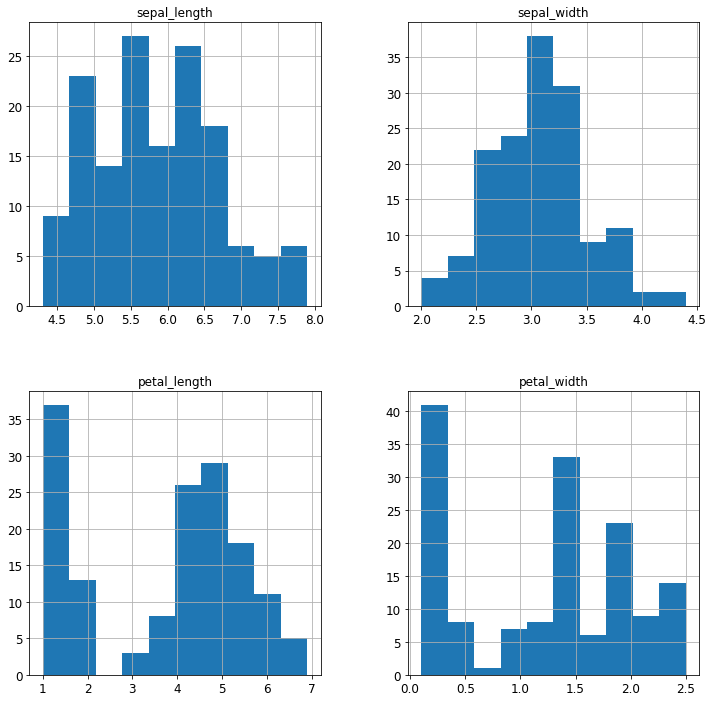

In [12]:
dfi.hist(figsize=(12,12),xlabelsize=12,ylabelsize=12)

#### 1.3.c. Fonction `jointplot` (librairie seaborn)
**Seaborn** est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur matplotlib, et s’intègre très bien avec pandas.
La fonction `jointplot` permet de tracer la distribution jointe de deux caractéristiques. On va par exemple regarder s'il y a une corrélation entre la longueur d'un pétale et sa largeur, ainsi qu'entre la largeur et la longueur d'un sépale. 

<div class="warn">
Encore une fois, on n'hésitera pas à utiliser une <b>"Cheat Sheet"</b> pour faire des copier/coller des principales commandes. Il en existe plusieurs pour seaborn, dont  la <a href="http://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247">Cheat Sheet  de DataCamp, télécheargeable</a>.
</div>

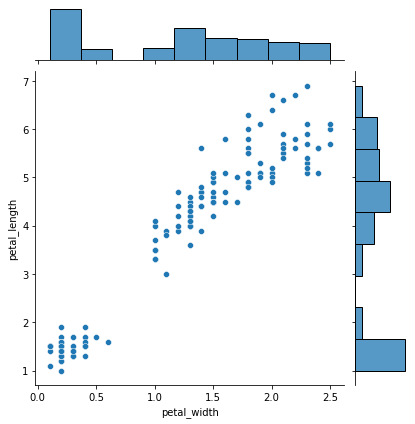

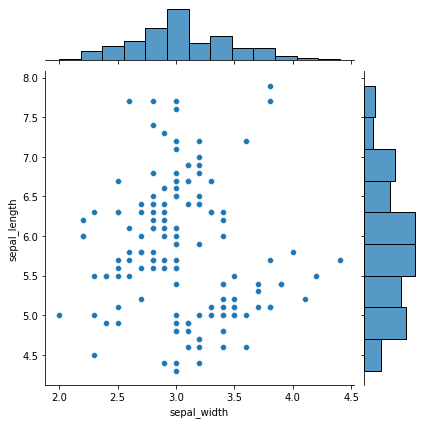

In [13]:
sb.jointplot(x = "petal_width", y = "petal_length", data = dfi)
sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi)

<div class="warn">On va faire la même chose que précédemment, mais avec l'option <code>hue</code> (<i>teinte</i>) afin d'attribuer une couleur aux points en fonction de l'espèce d'Iris (variable 'species')</div>

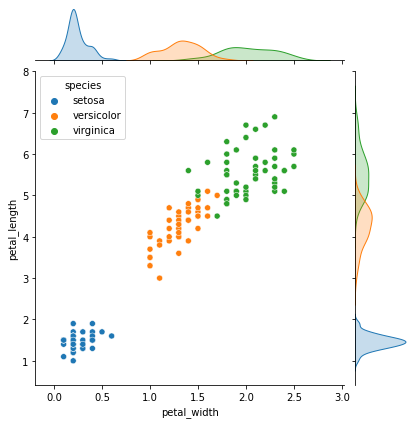

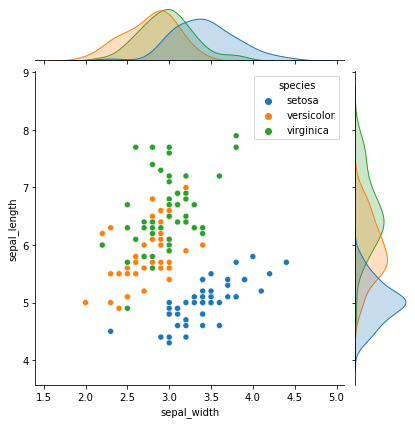

In [14]:
import seaborn as sb
sb.jointplot(x = "petal_width", y = "petal_length", data = dfi, hue="species")
sb.jointplot(x = "sepal_width", y = "sepal_length", data = dfi, hue="species")

<div class="warn">
<li> le <b>résultat marquant</b> est que non seulement il y a corrélation entre longueur et largeur des pétales, mais il y a aussi une claire <b>séparation des espèces</b> qui semblent <span style="color:red"><b>classifiables</b></span> en fonction de la longueur et largeur de leurs pétales (<i>setosa</i> : pétales courts, <i>versicolor</i> : pétales moyens, <i>virginica</i> : pétales longs)<br>
<li> en revanche, les epèces d'Iris <i>versicolor</i> et <i>virginica</i> ont des sépales de longueur et largeur similaires ("mélange" des points verts et orange). Ces 2 propriétés ne sont pas des bons descripteurs permettant de classifier ces variétés d'iris
</div>
<br>
<div class="warn">
    Cette notion de <b><span style="color:red">classification</span></b> est importante dans la perspective d'utiliser des algorithmes d'intelligence artificielle de type <b>apprentissage automatique (machine learning)</b>.
</div>
<br>
<div class="rq">
    Les espèces <i>setosa</i> étant les plus petites, il est immédiat de les identifier et de les sélectionner grâce aux tests conditionnels :
</div>

In [ ]:
display(dfi[ (dfi["petal_width"] < 1) & (dfi["petal_length"] < 2)])

#### 1.3.c. Fonction `pairplot` (librairie seaborn)
La fonction `pairplot` permet de simultanément visualiser les corrélations potentielles entre toutes les variables. On retrouve sur la diagonale les histogrammes de distribution de chacune des variables.
<div class=warn>
<b>Patience !</b> Ce tracé prend un peu de temps
<br>Tant qu'on voit <code>In [*]</code> à gauche de la cellule qu'on est en train d'exécuter, c'est-à-dire avec une * au lieu d'un numéro de sortie, c'est que python est occupé à interpréter la série de commandes de la cellule
</div>

In [ ]:
sb.pairplot(dfi,hue='species')

#### 1.2.d. Fonctions `corr` (librairie pandas) `heatmap` (librairie seaborn)
On vient de voir que certaines variables semblent corrélées entre elles, en particulier la longueur et la largeur des pétales. Les **cartes thermiques** (**heatmaps**) font partie de la panoplie du data scientist. Elles permettent de rapidement identifier si des variables sont corrélées entre elles. Il faut pour cela avoir au préalable calculé la matrice de corrélation à l'aide de la fonction  [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

<div class="rq">
<b> fonction corr() </b>
  <li> La valeur de la corrélation va de -1 à +1
  <li> corrélation nulle : deux variables sont indépendantes l’une de l’autre
  <li> corrélation positive : les variables évoluent dans le même sens
  <li> corrélation négative : les variables évoluent en sens contraire
</div>

In [ ]:
display(dfi.corr())

On va maintenant visualiser cette carte sous forme graphique, en y reportant ces nombres

In [ ]:
plt.figure(figsize = (10,8))
sb.set(font_scale=1.2)
sb.heatmap(dfi.corr(), vmin = -1, vmax = +1, annot = True, cmap='coolwarm')

<div class="warn">
    <li> il n'y a que des 1 sur la diagonale > <b> normal !</b><i> une variable est forcément corrélée avec elle-même</i>
<li> il n'y a <i>pas de corrélation significative</i> entre longueur et largeur des sépales (cases bleu clair) 
<li> il y a <i>proportionalité</i> entre longueur de sépales et longueur et largeur des pétales (cases rouge vif)
<li> la largeur des sépales est plutôt <i>inversement proportionnelle</i> à la largeur et à la longueur des pétales (cases bleues)
</div>

### Bilan de la première partie

### Évaluation formative après la vidéo

In [ ]:
vID.end()